# <center> <h1>    🌇  🧑‍💻  🌆

In [1]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# rasmlarni o'qib olamiz
before = cv2.imread('Photos/before.jpg')
after = cv2.imread('Photos/after.jpg')

before = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
after = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)

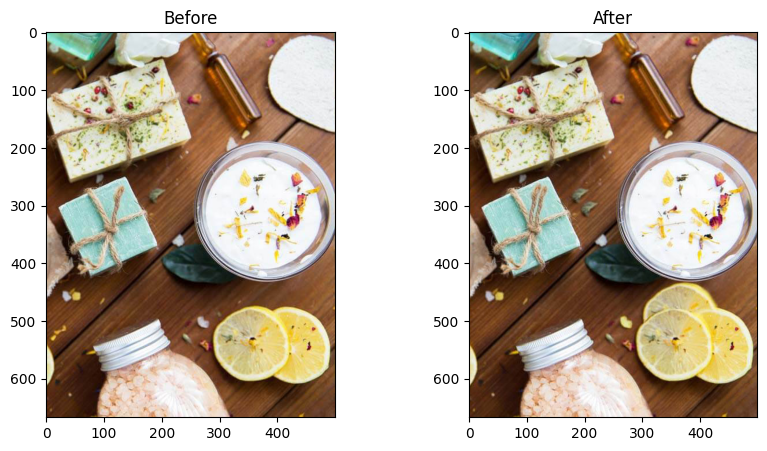

In [3]:
# Rasmdagi farqlani toping
plt.figure(figsize=(10,5))
plt.subplot(121)          
plt.title("Before")
plt.imshow(before)   

plt.subplot(122)          
plt.title("After")
plt.imshow(after) 

In [4]:
# Rasmlarni Gray formatga o'takizb olamiz
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

In [5]:
# structural_similarity - orqali oradagi farqlarni topib olamiz
(score, difference) = structural_similarity(before_gray, after_gray, full=True)
print("Rasmlarning o'xshashligi: {:.4f}%".format(score * 100))

Rasmlarning o'xshashligi: 91.5133%


## <center> SSIM - structure similarity

<center>
    
# 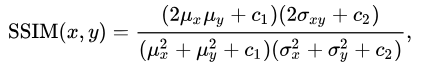

<center>

# 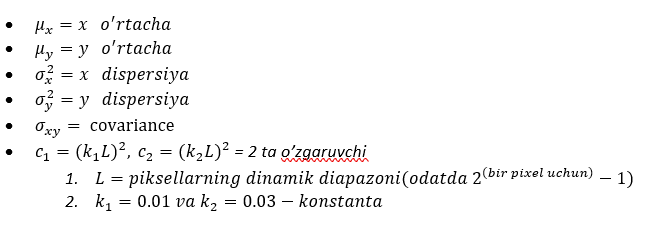

In [6]:
difference

array([[0.77981667, 0.77379243, 0.76090443, ..., 0.74393532, 0.75038351,
        0.78579677],
       [0.81493461, 0.80001422, 0.78539139, ..., 0.6855256 , 0.68850498,
        0.72703483],
       [0.83539981, 0.8177267 , 0.80127298, ..., 0.60545936, 0.61423929,
        0.65510945],
       ...,
       [0.91904225, 0.90909206, 0.91491421, ..., 0.95116963, 0.93961819,
        0.95155501],
       [0.96305497, 0.96158612, 0.96224906, ..., 0.94917055, 0.93932418,
        0.95108031],
       [0.97344195, 0.97384598, 0.97179593, ..., 0.94759714, 0.93964128,
        0.95077943]])

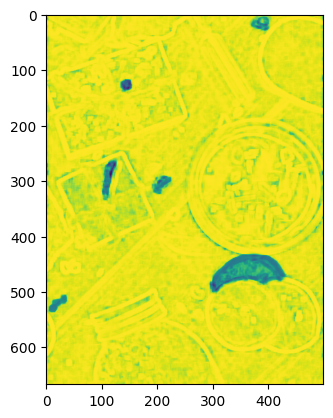

In [7]:
plt.imshow(difference)

In [8]:
difference.shape

(667, 500)

In [9]:
# difference rasmimizni  8-bitga o'tkazib olamiz chunki OpenCV unit8 bilan ishlaydi
difference = (difference * 255).astype("uint8")
# merge orqali biz biz rgb rasm hosil qilmiz
difference_box = cv2.merge([difference, difference, difference])

In [10]:
difference

array([[198, 197, 194, ..., 189, 191, 200],
       [207, 204, 200, ..., 174, 175, 185],
       [213, 208, 204, ..., 154, 156, 167],
       ...,
       [234, 231, 233, ..., 242, 239, 242],
       [245, 245, 245, ..., 242, 239, 242],
       [248, 248, 247, ..., 241, 239, 242]], dtype=uint8)

In [11]:
difference_box

array([[[198, 198, 198],
        [197, 197, 197],
        [194, 194, 194],
        ...,
        [189, 189, 189],
        [191, 191, 191],
        [200, 200, 200]],

       [[207, 207, 207],
        [204, 204, 204],
        [200, 200, 200],
        ...,
        [174, 174, 174],
        [175, 175, 175],
        [185, 185, 185]],

       [[213, 213, 213],
        [208, 208, 208],
        [204, 204, 204],
        ...,
        [154, 154, 154],
        [156, 156, 156],
        [167, 167, 167]],

       ...,

       [[234, 234, 234],
        [231, 231, 231],
        [233, 233, 233],
        ...,
        [242, 242, 242],
        [239, 239, 239],
        [242, 242, 242]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [242, 242, 242],
        [239, 239, 239],
        [242, 242, 242]],

       [[248, 248, 248],
        [248, 248, 248],
        [247, 247, 247],
        ...,
        [241, 241, 241],
        [239, 239, 239],
        [242, 242, 242]]

In [12]:
# rasmni binary ga o'tkazib olamiz va uning konturlarini topamiz
thresh = cv2.threshold(difference, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

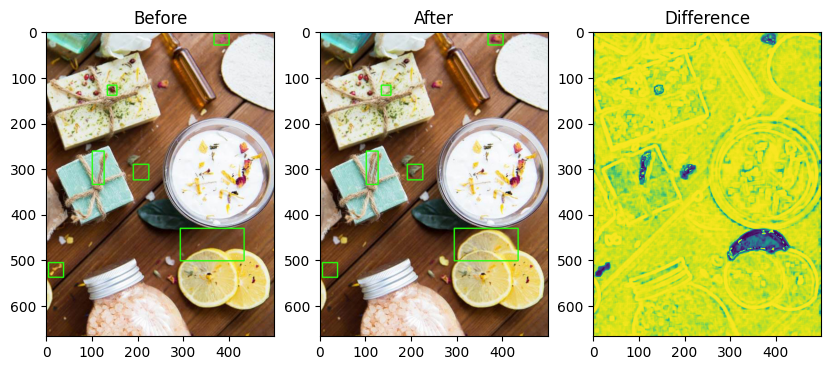

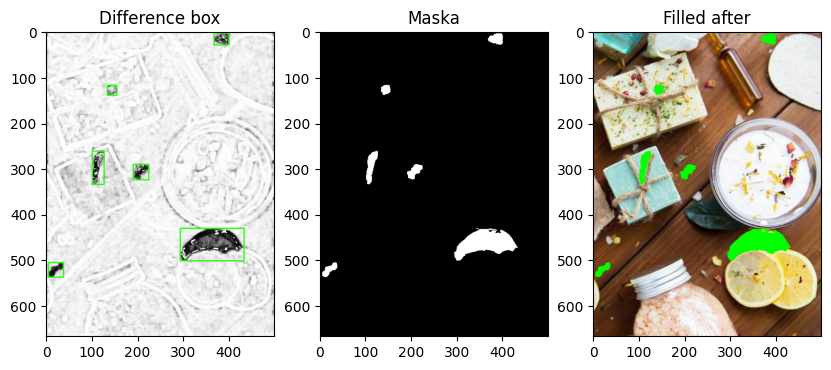

In [13]:
maska = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(difference_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(maska, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

plt.figure(figsize=(10,10))

plt.subplot(131)          
plt.title("Before")
plt.imshow(before)   
plt.subplot(132)          
plt.title("After")
plt.imshow(after)  
plt.subplot(133)          
plt.title("Difference")
plt.imshow(difference)  

plt.figure(figsize=(10,10))
plt.subplot(131)          
plt.title("Difference box")
plt.imshow(difference_box)   
plt.subplot(132)          
plt.title("Maska")
plt.imshow(maska)  
plt.subplot(133)          
plt.title("Filled after")
plt.imshow(filled_after) 

# <center> <h1> 👨‍💻   🚀  